<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/01_Data_Ingestion_%26_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 01. Installing Libraries


In [2]:
!pip install quandl
!pip install yfinance


# Importing required libraries


In [3]:
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import quandl
import json

# Required configuration file which has secret API Key

In [4]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config/Config_Git.json"

# Open the file for reading and load the data from it
with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [5]:
CurrentDate = (datetime.today() - timedelta(days=0)).strftime('%Y-%m-%d')
CurrentDate

'2023-07-05'

In [6]:
FirstDay='2020-01-01'


# Data Collection & Preparation

In [7]:
def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [8]:
OilPriceInUSD=getDataFromAPI("Nasdaq","OPEC/ORB",FirstDay,CurrentDate).reset_index()
OilPriceInUSD['Date'] = pd.to_datetime(OilPriceInUSD['Date']).dt.date
OilPriceInUSD.set_index('Date', inplace=True)
OilPriceInUSD

,Value
Date,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09
...,...
2023-06-27,75.15
2023-06-28,74.38
2023-06-29,74.34


In [9]:
OilPriceInUSD.isna().sum()

Value    0
dtype: int64

In [10]:
OilPriceInUSD=OilPriceInUSD.asfreq('b')
OilPriceInUSD.isna().sum()

Value    12
dtype: int64

In [11]:
OilPriceInUSD.Value=OilPriceInUSD.Value.fillna(method='bfill')

In [12]:
OilPriceInUSD.isna().sum()

Value    0
dtype: int64

In [13]:
EuroPriceInUSD=getDataFromAPI("YFinance","EURUSD=X",FirstDay,CurrentDate).reset_index()
EuroPriceInUSD['Date'] = pd.to_datetime(EuroPriceInUSD['Date']).dt.date
EuroPriceInUSD.set_index('Date', inplace=True)
EuroPriceInUSD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,0,0.0,0.0
2019-01-02,1.146132,1.149700,1.134572,1.146171,0,0.0,0.0
2019-01-03,1.131734,1.140914,1.131734,1.131811,0,0.0,0.0
2019-01-04,1.139095,1.141774,1.134816,1.139108,0,0.0,0.0
2019-01-07,1.141292,1.147447,1.140524,1.141044,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-28,1.095722,1.096251,1.089966,1.095722,0,0.0,0.0
2023-06-29,1.091584,1.094068,1.086236,1.091584,0,0.0,0.0
2023-06-30,1.086803,1.093374,1.083647,1.086803,0,0.0,0.0


In [14]:
EuroPriceInUSD.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [15]:
EuroPriceInUSD=EuroPriceInUSD.asfreq('b')
EuroPriceInUSD.isna().sum()

Open            1
High            1
Low             1
Close           1
Volume          1
Dividends       1
Stock Splits    1
dtype: int64

In [16]:
EuroPriceInUSD.Close=EuroPriceInUSD.Close.fillna(method='bfill')

In [17]:
EuroPriceInUSD.isna().sum()

Open            1
High            1
Low             1
Close           0
Volume          1
Dividends       1
Stock Splits    1
dtype: int64

In [18]:
data=EuroPriceInUSD.merge(OilPriceInUSD, on='Date', how='inner').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value
0,2019-01-02,1.146132,1.149700,1.134572,1.146171,0.0,0.0,0.0,52.14
1,2019-01-03,1.131734,1.140914,1.131734,1.131811,0.0,0.0,0.0,52.93
2,2019-01-04,1.139095,1.141774,1.134816,1.139108,0.0,0.0,0.0,55.13
3,2019-01-07,1.141292,1.147447,1.140524,1.141044,0.0,0.0,0.0,56.42
4,2019-01-08,1.147934,1.148633,1.142465,1.147974,0.0,0.0,0.0,56.09
...,...,...,...,...,...,...,...,...,...
1169,2023-06-27,1.091048,1.097610,1.090322,1.091048,0.0,0.0,0.0,75.15
1170,2023-06-28,1.095722,1.096251,1.089966,1.095722,0.0,0.0,0.0,74.38
1171,2023-06-29,1.091584,1.094068,1.086236,1.091584,0.0,0.0,0.0,74.34
1172,2023-06-30,1.086803,1.093374,1.083647,1.086803,0.0,0.0,0.0,76.14


In [19]:
selected_data = data[['Date', 'Close', 'Value']]
selected_data = selected_data.rename(columns={'Close': 'Original_USD_EUR_Price', 'Value': 'Original_Oil_Price'})
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data

,Original_USD_EUR_Price,Original_Oil_Price
Date,,
2019-01-02,1.146171,52.14
2019-01-03,1.131811,52.93
2019-01-04,1.139108,55.13
2019-01-07,1.141044,56.42
2019-01-08,1.147974,56.09
...,...,...
2023-06-27,1.091048,75.15
2023-06-28,1.095722,74.38
2023-06-29,1.091584,74.34


In [20]:
selected_data['Original_USD_EUR_Price'].describe()


count    1174.000000
mean        1.119847
std         0.058026
min         0.959619
25%         1.085891
50%         1.119833
75%         1.170618
max         1.234111
Name: Original_USD_EUR_Price, dtype: float64

In [21]:
selected_data['Original_Oil_Price'].describe()


count    1174.000000
mean       69.977428
std        22.100147
min        12.220000
25%        59.295000
50%        68.545000
75%        82.050000
max       128.270000
Name: Original_Oil_Price, dtype: float64

In [22]:
df_USD_EUR=selected_data[['Original_USD_EUR_Price']]


In [23]:
df_Oil_InUSD=selected_data[['Original_Oil_Price']]

# Data Visualization

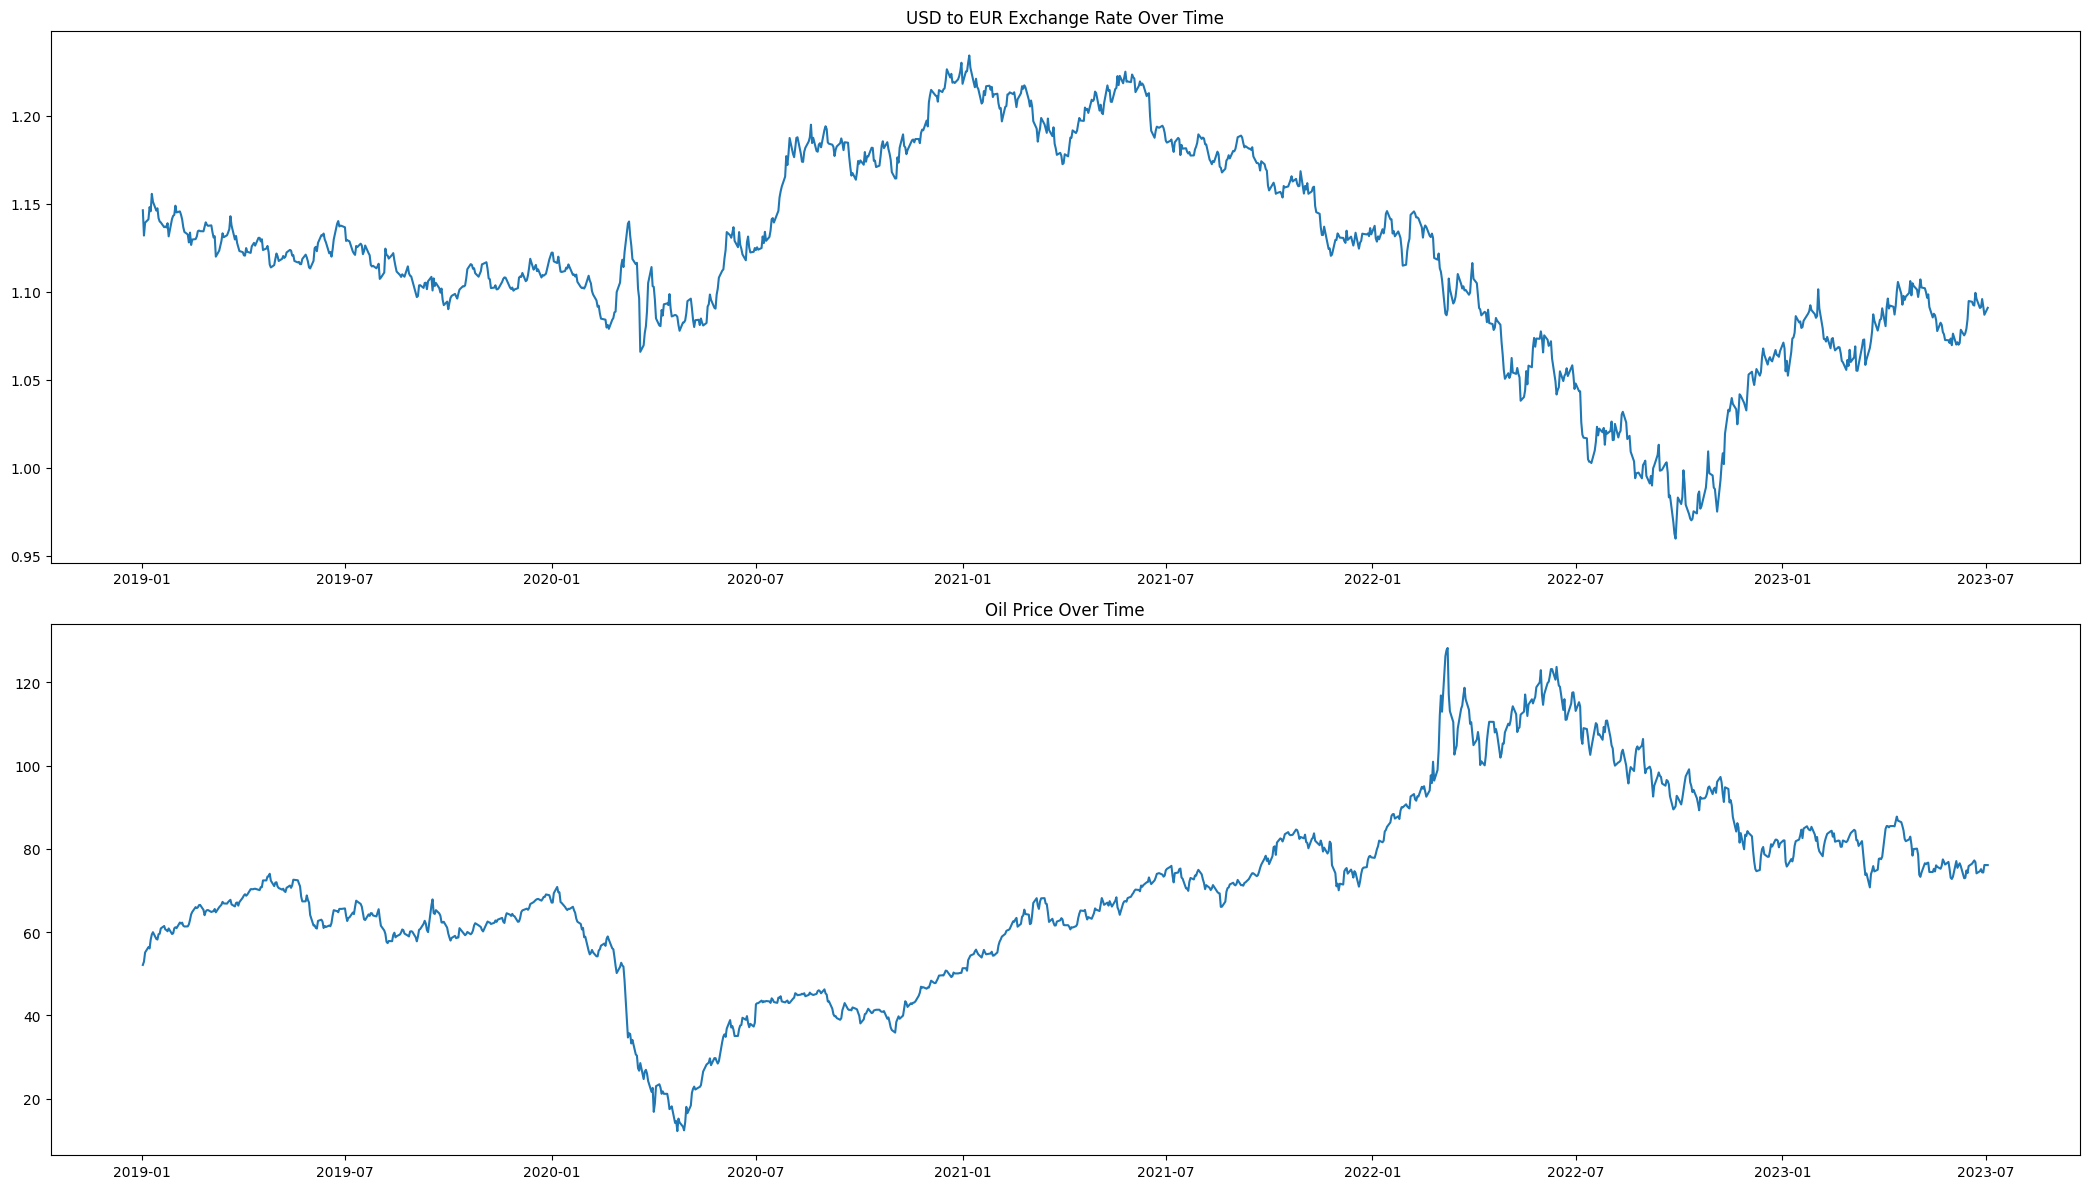

In [24]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 12))

# Plot the first chart on the first subplot
ax1.plot(df_USD_EUR.index, df_USD_EUR['Original_USD_EUR_Price'])
ax1.set_title('USD to EUR Exchange Rate Over Time')

# Plot the second chart on the second subplot
ax2.plot(df_Oil_InUSD.index, df_Oil_InUSD['Original_Oil_Price'])
ax2.set_title('Oil Price Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with both charts
plt.show()


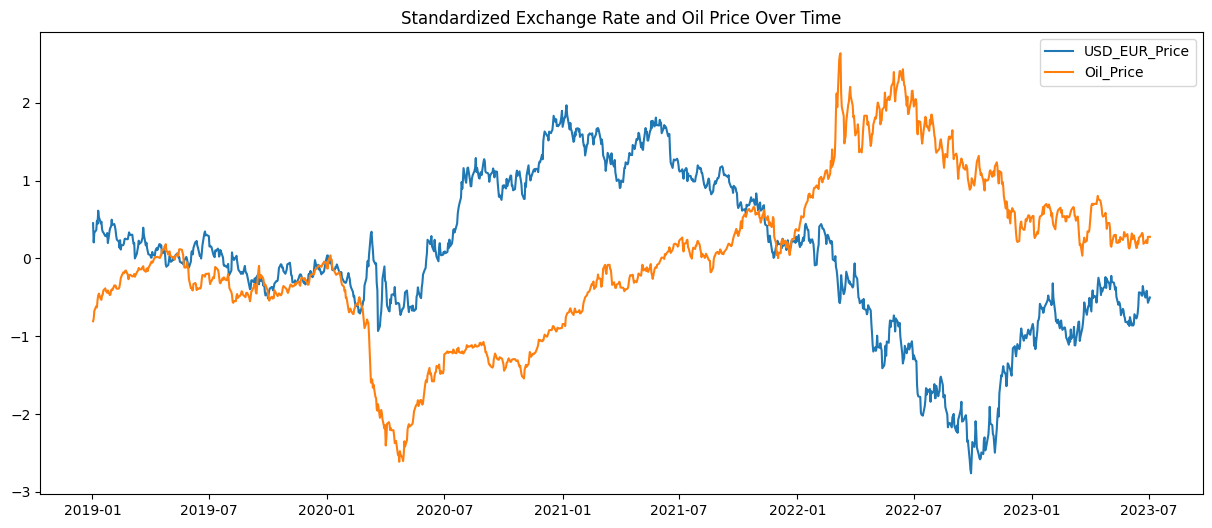

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

df_USD_EUR['USD_EUR_Price_standardized'] = (df_USD_EUR['Original_USD_EUR_Price'] - df_USD_EUR['Original_USD_EUR_Price'].mean()) / df_USD_EUR['Original_USD_EUR_Price'].std()
df_Oil_InUSD['Oil_Price_standardized'] = (df_Oil_InUSD['Original_Oil_Price'] - df_Oil_InUSD['Original_Oil_Price'].mean()) / df_Oil_InUSD['Original_Oil_Price'].std()

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df_USD_EUR.index, df_USD_EUR['USD_EUR_Price_standardized'], label='USD_EUR_Price')
ax.plot(df_Oil_InUSD.index, df_Oil_InUSD['Oil_Price_standardized'], label='Oil_Price')

ax.set_title('Standardized Exchange Rate and Oil Price Over Time')
ax.legend()

plt.show()


In [27]:
df_USD_EUR = df_USD_EUR.drop(['USD_EUR_Price_standardized'], axis=1)
df_Oil_InUSD = df_Oil_InUSD.drop(['Oil_Price_standardized'], axis=1)


In [35]:
df_USD_EUR.to_csv('/content/drive/MyDrive/dissertation/df_USD_EUR.csv', index=True)


In [36]:
df_Oil_InUSD.to_csv('/content/drive/MyDrive/dissertation/df_Oil_InUSD.csv', index=True)
